In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv(r"F:\heart.csv")
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [ ]:
data['target'].value_counts()


1    526
0    499
Name: target, dtype: int64

In [ ]:
no_disease=data[data['target']==0]
yes_disease=data[data['target']==1]

<AxesSubplot:xlabel='trestbps', ylabel='chol'>

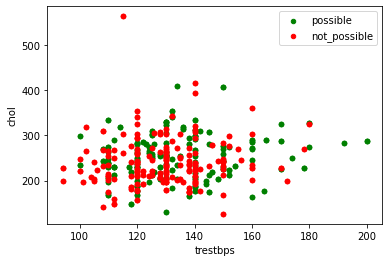

In [ ]:
sallu=no_disease.plot(kind='scatter',x='trestbps',y='chol',label='possible',color='g')
yes_disease.plot(kind='scatter',x='trestbps',y='chol',color='r',label='not_possible',ax=sallu)

In [ ]:
model=data[['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']]
model

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [ ]:
a=np.array(model)
b=np.array(data['target'])
a
b

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [ ]:
from sklearn.model_selection import train_test_split
a_train,a_test,b_train,b_test=train_test_split(a,b,test_size=0.2,random_state=4)

In [ ]:
a_train.shape


(820, 13)

In [ ]:
a_test.shape

(205, 13)

In [ ]:
b_test.shape

(205,)

In [ ]:
b_train.shape

(820,)

In [ ]:
from sklearn import svm
classifier=svm.SVC(kernel='linear',gamma='auto',C=2)
classifier.fit(a_train,b_train)
b_predict=classifier.predict(a_test)

In [ ]:
from sklearn.metrics import classification_report
classification_report(b_test,b_predict)
print(classification_report(b_test,b_predict))

              precision    recall  f1-score   support

           0       0.93      0.73      0.82       107
           1       0.76      0.94      0.84        98

    accuracy                           0.83       205
   macro avg       0.84      0.83      0.83       205
weighted avg       0.85      0.83      0.83       205

